In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import os
import shutil
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob

In [2]:
data_dir = './COVID-19_Radiography_Dataset'
categories = ['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia']
data = []

for category in categories:
    temp = category +"/images/"
    folder = os.path.join(data_dir, temp)
    label = categories.index(category)
    for file in os.listdir(folder):
        if file.endswith('.png'):
            data.append((os.path.join(folder, file), label))

df = pd.DataFrame(data, columns=['file_path', 'label'])
df = df.sample(frac=1).reset_index(drop=True) # for shuffling the dataset

In [3]:
data

[('./COVID-19_Radiography_Dataset/COVID/images/COVID-1.png', 0),
 ('./COVID-19_Radiography_Dataset/COVID/images/COVID-1175.png', 0),
 ('./COVID-19_Radiography_Dataset/COVID/images/COVID-1613.png', 0),
 ('./COVID-19_Radiography_Dataset/COVID/images/COVID-948.png', 0),
 ('./COVID-19_Radiography_Dataset/COVID/images/COVID-790.png', 0),
 ('./COVID-19_Radiography_Dataset/COVID/images/COVID-3004.png', 0),
 ('./COVID-19_Radiography_Dataset/COVID/images/COVID-3010.png', 0),
 ('./COVID-19_Radiography_Dataset/COVID/images/COVID-1607.png', 0),
 ('./COVID-19_Radiography_Dataset/COVID/images/COVID-784.png', 0),
 ('./COVID-19_Radiography_Dataset/COVID/images/COVID-1161.png', 0),
 ('./COVID-19_Radiography_Dataset/COVID/images/COVID-2468.png', 0),
 ('./COVID-19_Radiography_Dataset/COVID/images/COVID-1149.png', 0),
 ('./COVID-19_Radiography_Dataset/COVID/images/COVID-2440.png', 0),
 ('./COVID-19_Radiography_Dataset/COVID/images/COVID-3038.png', 0),
 ('./COVID-19_Radiography_Dataset/COVID/images/COVID-2

In [4]:
df

,file_path,label
0,./COVID-19_Radiography_Dataset/Normal/images/N...,2
1,./COVID-19_Radiography_Dataset/Normal/images/N...,2
2,./COVID-19_Radiography_Dataset/Normal/images/N...,2
3,./COVID-19_Radiography_Dataset/Normal/images/N...,2
4,./COVID-19_Radiography_Dataset/Normal/images/N...,2
...,...,...
21160,./COVID-19_Radiography_Dataset/Normal/images/N...,2
21161,./COVID-19_Radiography_Dataset/Normal/images/N...,2
21162,./COVID-19_Radiography_Dataset/Normal/images/N...,2
21163,./COVID-19_Radiography_Dataset/Normal/images/N...,2


image dimensions: (299, 299)


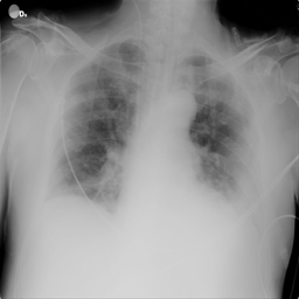

In [5]:
covid_image_path = './COVID-19_Radiography_Dataset/COVID/images/COVID-1.png'
covid_image = Image.open(covid_image_path)
print("image dimensions:", covid_image.size)
covid_image

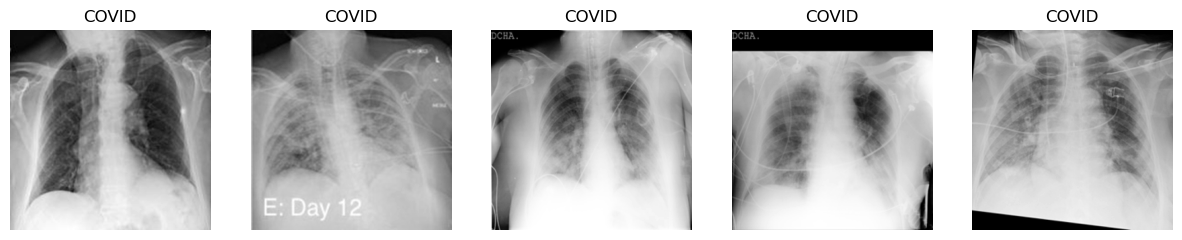

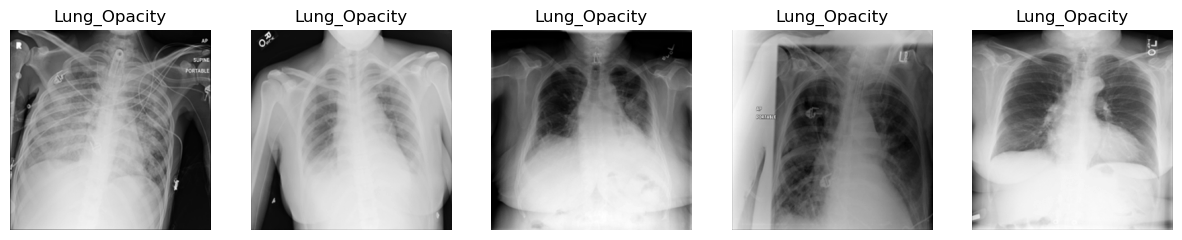

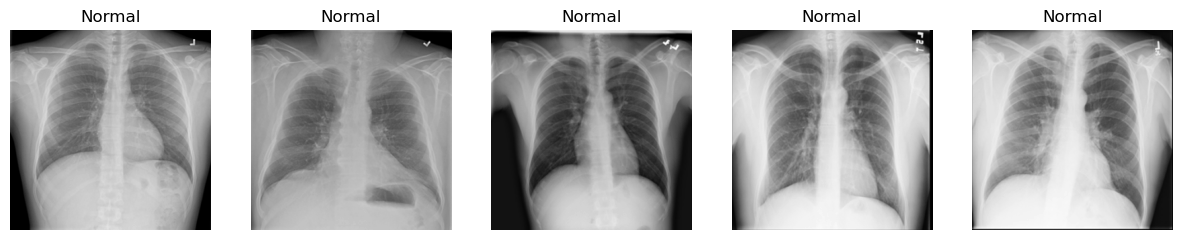

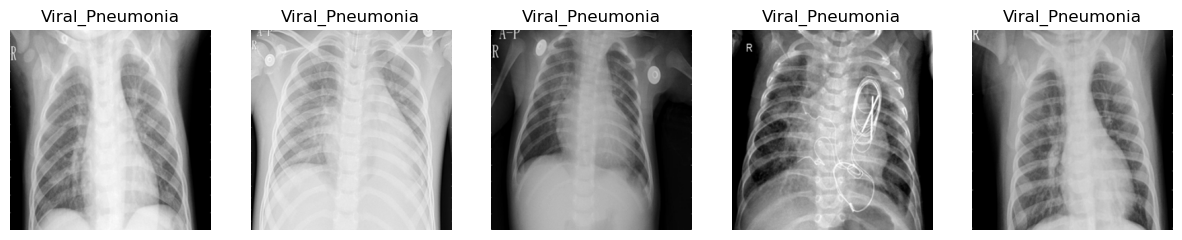

In [6]:
def plot_samples(df, category, n=5):
    samples = df[df['label'] == categories.index(category)]
    n = min(n, len(samples))
    samples = samples.sample(n)
    plt.figure(figsize=(15, 5))
    for i, (file_path, label) in enumerate(samples.values):
        plt.subplot(1, n, i+1)
        img = plt.imread(file_path)
        plt.imshow(img, cmap='gray')
        plt.title(f'{category}')
        plt.axis('off')
    plt.show()

for category in categories:
    plot_samples(df, category)

In [7]:
counts = df['label'].value_counts().sort_index()
counts.index = [categories[i] for i in counts.index]

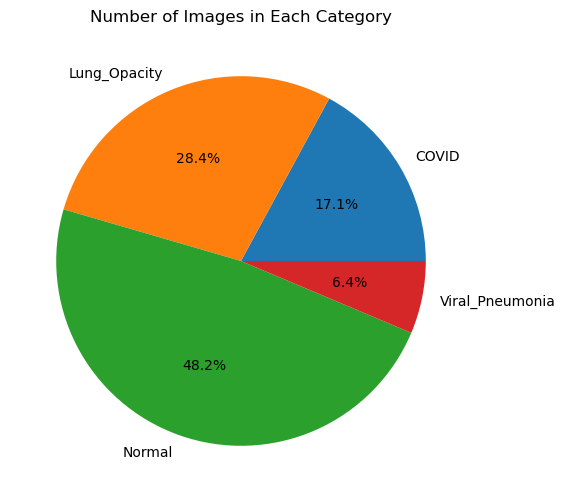

In [8]:
plt.figure(figsize=(10, 6))
counts.plot(kind='pie',autopct='%1.1f%%')
plt.title('Number of Images in Each Category')
plt.ylabel('')
plt.xticks(rotation=0)
plt.show()

In [9]:
categories

['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia']

In [10]:
df['label'].value_counts()

2    10192
1     6012
0     3616
3     1345
Name: label, dtype: int64

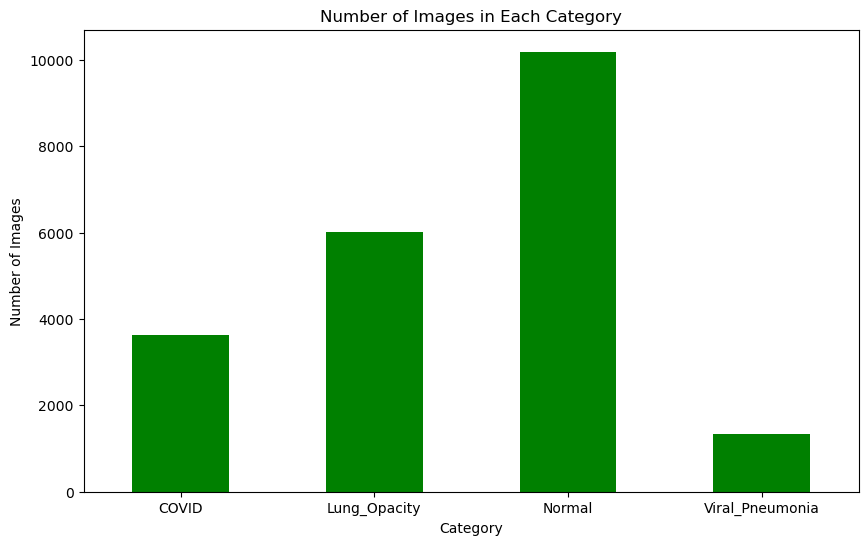

In [11]:
plt.figure(figsize=(10, 6))
counts.plot(kind='bar',color = 'green')
plt.title('Number of Images in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.xticks(rotation=0)
plt.show()

In [12]:
categories

['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia']

In [13]:
# Define the path to the main dataset folder
dataset_folder = "COVID-19_Radiography_Dataset"

# Define the subdirectories
subdirectories = ["COVID", "Lung_Opacity", "Normal", "Viral_Pneumonia"]

# Create train, test, and validate directories
train_dir = "train"
test_dir = "test"
#validate_dir = "validate"

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
#os.makedirs(validate_dir, exist_ok=True)

# Split the data into train, test, and validate sets
for subdir in subdirectories:
    subdir_path = os.path.join(dataset_folder, subdir, "images")
    images = os.listdir(subdir_path)
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    #train_images, validate_images = train_test_split(train_images, test_size=0.25, random_state=42)

    # Create subdirectories in train, test, and validate
    train_subdir = os.path.join(train_dir, subdir)
    test_subdir = os.path.join(test_dir, subdir)
    #validate_subdir = os.path.join(validate_dir, subdir)
    os.makedirs(train_subdir, exist_ok=True)
    os.makedirs(test_subdir, exist_ok=True)
    #os.makedirs(validate_subdir, exist_ok=True)

    # Move images to respective directories
    for image in train_images:
        src = os.path.join(subdir_path, image)
        dst = os.path.join(train_subdir, image)
        shutil.copy(src, dst)

    for image in test_images:
        src = os.path.join(subdir_path, image)
        dst = os.path.join(test_subdir, image)
        shutil.copy(src, dst)

#     for image in validate_images:
#         src = os.path.join(subdir_path, image)
#         dst = os.path.join(validate_subdir, image)
#         shutil.copy(src, dst)

print("Dataset split into train, test, and validate sets successfully.")

Dataset split into train, test, and validate sets successfully.


In [14]:
#Taking unequal number of images from each of the classes for training.

main_path = "./"


train_path = os.path.join(main_path,"train")
test_path=os.path.join(main_path,"test")

train_COVID = glob.glob(train_path+"/COVID/*.png")
train_Lung_Opacity = glob.glob(train_path+"/Lung_Opacity/*.png")
train_Normal = glob.glob(train_path+"/Normal/*.png")
train_Viral_Pneumonia = glob.glob(train_path+"/Viral_Pneumonia/*.png")

test_COVID = glob.glob(test_path+"/COVID/*.png")
test_Lung_Opacity = glob.glob(test_path+"/Lung_Opacity/*.png")
test_Normal = glob.glob(test_path+"/Normal/*.png")
test_Viral_Pneumonia = glob.glob(test_path+"/Viral_Pneumonia/*.png")


train_labels = np.concatenate([np.zeros(len(train_COVID)), np.ones(len(train_Lung_Opacity)),np.ones(len(train_Normal))*2,np.ones(len(train_Viral_Pneumonia))*3])
test_labels = np.concatenate([np.zeros(len(test_COVID)), np.ones(len(test_Lung_Opacity)),np.ones(len(test_Normal))*2,np.ones(len(test_Viral_Pneumonia))*3])
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_list = [x for x in train_COVID]
train_list.extend([x for x in train_Lung_Opacity])
train_list.extend([x for x in train_Normal])
train_list.extend([x for x in train_Viral_Pneumonia])

df_train = pd.DataFrame(np.concatenate([['COVID']*len(train_COVID) , ['Lung_Opacity']*len(train_Lung_Opacity),['Normal']*len(train_Normal),['Viral_Pneumonia']*len(train_Viral_Pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in test_COVID]
test_list.extend([x for x in test_Lung_Opacity])
test_list.extend([x for x in test_Normal])
test_list.extend([x for x in test_Viral_Pneumonia])

df_test = pd.DataFrame(np.concatenate([['COVID']*len(test_COVID) , ['Lung_Opacity']*len(test_Lung_Opacity),['Normal']*len(test_Normal),['Viral_Pneumonia']*len(test_Viral_Pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]


In [15]:
df_test

,class,image
0,COVID,./test/COVID/COVID-1.png
1,COVID,./test/COVID/COVID-1607.png
2,COVID,./test/COVID/COVID-2326.png
3,COVID,./test/COVID/COVID-2332.png
4,COVID,./test/COVID/COVID-2497.png
...,...,...
4230,Viral_Pneumonia,./test/Viral_Pneumonia/Viral Pneumonia-18.png
4231,Viral_Pneumonia,./test/Viral_Pneumonia/Viral Pneumonia-225.png
4232,Viral_Pneumonia,./test/Viral_Pneumonia/Viral Pneumonia-557.png
4233,Viral_Pneumonia,./test/Viral_Pneumonia/Viral Pneumonia-219.png


In [16]:
df_train['class'].value_counts()

Normal             8153
Lung_Opacity       4809
COVID              2892
Viral_Pneumonia    1076
Name: class, dtype: int64

In [17]:
df_test['class'].value_counts()

Normal             2039
Lung_Opacity       1203
COVID               724
Viral_Pneumonia     269
Name: class, dtype: int64

In [18]:
from numpy.random import seed
import random
seed(42)
SEED = 42

random.seed(42)
train_df, val_df = train_test_split(df_train, test_size = 0.20, random_state = SEED, stratify = df_train['class'])

In [19]:
train_df

,class,image
4740,Lung_Opacity,./train/Lung_Opacity/Lung_Opacity-5459.png
15817,Normal,./train/Normal/Normal-7534.png
8672,Normal,./train/Normal/Normal-1837.png
16699,Viral_Pneumonia,./train/Viral_Pneumonia/Viral Pneumonia-816.png
9360,Normal,./train/Normal/Normal-9101.png
...,...,...
11112,Normal,./train/Normal/Normal-1306.png
4298,Lung_Opacity,./train/Lung_Opacity/Lung_Opacity-5258.png
5533,Lung_Opacity,./train/Lung_Opacity/Lung_Opacity-1753.png
4064,Lung_Opacity,./train/Lung_Opacity/Lung_Opacity-4812.png


In [20]:
val_df

,class,image
10294,Normal,./train/Normal/Normal-7773.png
7028,Lung_Opacity,./train/Lung_Opacity/Lung_Opacity-4305.png
4002,Lung_Opacity,./train/Lung_Opacity/Lung_Opacity-2592.png
12357,Normal,./train/Normal/Normal-6289.png
7216,Lung_Opacity,./train/Lung_Opacity/Lung_Opacity-4705.png
...,...,...
7929,Normal,./train/Normal/Normal-8018.png
3834,Lung_Opacity,./train/Lung_Opacity/Lung_Opacity-2197.png
9541,Normal,./train/Normal/Normal-5921.png
3089,Lung_Opacity,./train/Lung_Opacity/Lung_Opacity-4253.png


In [21]:
IMG_SIZE = 224
BATCH = 32
train_datagen = ImageDataGenerator(rescale=1/255.,
                                  zoom_range = 0.1,
                                  rotation_range = 70,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1,
                                  horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1/255.)

ds_train = train_datagen.flow_from_dataframe(train_df,
                                             #directory=train_path, #dataframe contains the full paths
                                             x_col = 'image',
                                             y_col = 'class',
                                             target_size = (IMG_SIZE, IMG_SIZE),
                                             class_mode = 'categorical',
                                             batch_size = BATCH,
                                             seed = SEED)

ds_val = val_datagen.flow_from_dataframe(val_df,
                                            #directory=train_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'categorical',
                                            batch_size = BATCH,
                                            seed = SEED)

ds_test = val_datagen.flow_from_dataframe(df_test,
                                            #directory=test_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'categorical',
                                            batch_size = 1,
                                            shuffle = False)


Found 13544 validated image filenames belonging to 4 classes.
Found 3386 validated image filenames belonging to 4 classes.
Found 4235 validated image filenames belonging to 4 classes.


In [22]:
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-7,
    restore_best_weights=True,
)

plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.2,                                     
    patience = 2,                                   
    min_delt = 1e-7,                                
    cooldown = 0,                               
    verbose = 1
) 

In [23]:
def get_model():
#This is a model with 5 convolutional blocks
    # Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    # Block One
    x = layers.Conv2D(filters=16, kernel_size=3, padding='valid')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.1)(x)

    # Block Two
    x = layers.Conv2D(filters=32, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.1)(x)
    
    # Block Three
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)
    
    # Block Four
    x = layers.Conv2D(filters=128, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)
    
    # Block Five
    x = layers.Conv2D(filters=256, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Head
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    
    # Final Layer (Output)
    output = layers.Dense(4, activation='softmax')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

In [24]:
keras.backend.clear_session()

model = get_model()
# model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
#               , optimizer = keras.optimizers.Adam(learning_rate=3e-5), metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 16)      64        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 222, 222, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 16)      0     

In [25]:
history = model.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/50
423/423 [==============================] - 102s 239ms/step - loss: 1.1472 - accuracy: 0.5700 - val_loss: 1.0041 - val_accuracy: 0.5989 - lr: 0.0010
Epoch 2/50
423/423 [==============================] - 108s 254ms/step - loss: 0.9159 - accuracy: 0.6166 - val_loss: 2.3194 - val_accuracy: 0.2829 - lr: 0.0010
Epoch 3/50
424/423 [==============================] - ETA: 0s - loss: 0.8740 - accuracy: 0.6397
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
423/423 [==============================] - 107s 252ms/step - loss: 0.8740 - accuracy: 0.6397 - val_loss: 1.0346 - val_accuracy: 0.5629 - lr: 0.0010
Epoch 4/50
423/423 [==============================] - 105s 247ms/step - loss: 0.8174 - accuracy: 0.6568 - val_loss: 0.9935 - val_accuracy: 0.5794 - lr: 2.0000e-04
Epoch 5/50
423/423 [==============================] - 106s 251ms/step - loss: 0.8041 - accuracy: 0.6625 - val_loss: 1.0697 - val_accuracy: 0.5827 - lr: 2.0000e-04
Epoch 6/50
423/423 [===============

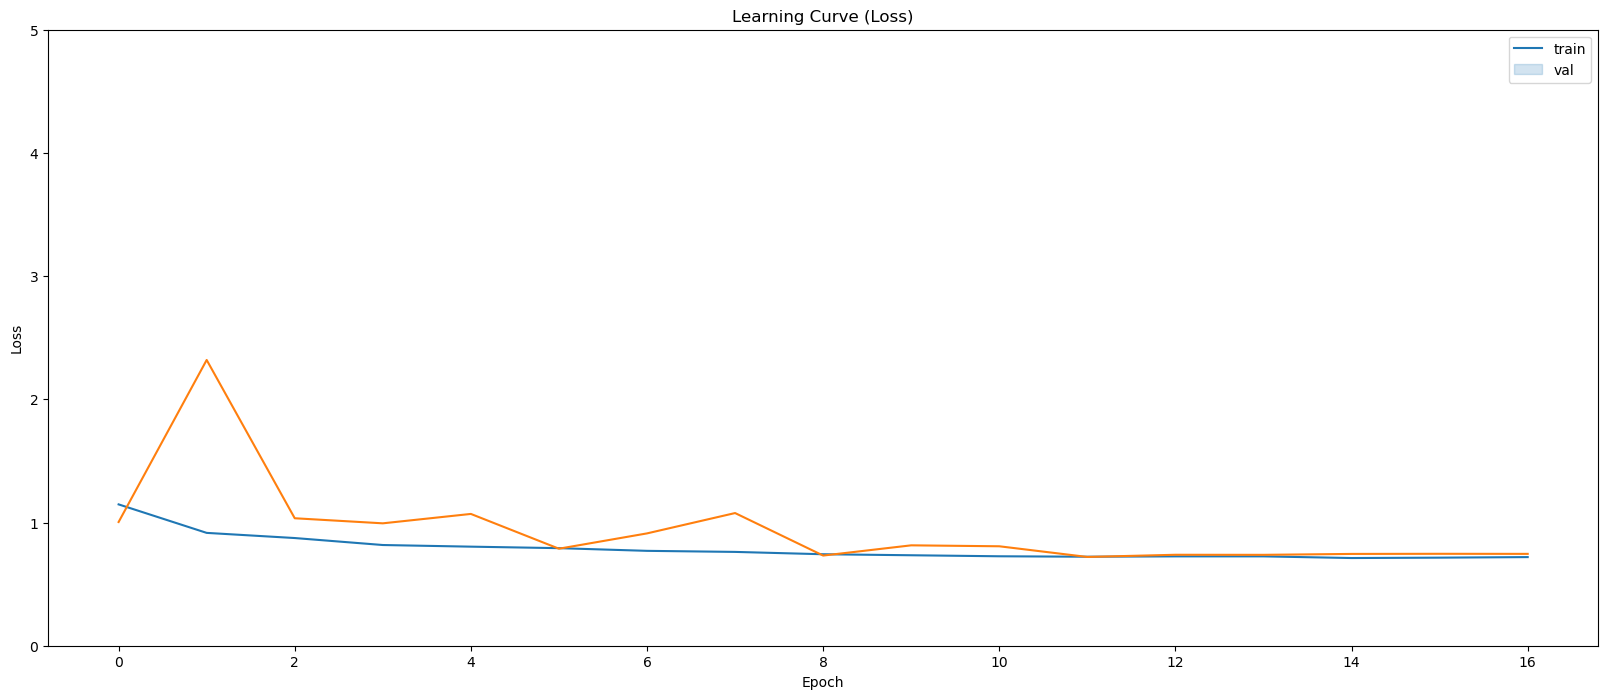

In [26]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 5)
ax.legend(['train', 'val'], loc='best')
plt.show()

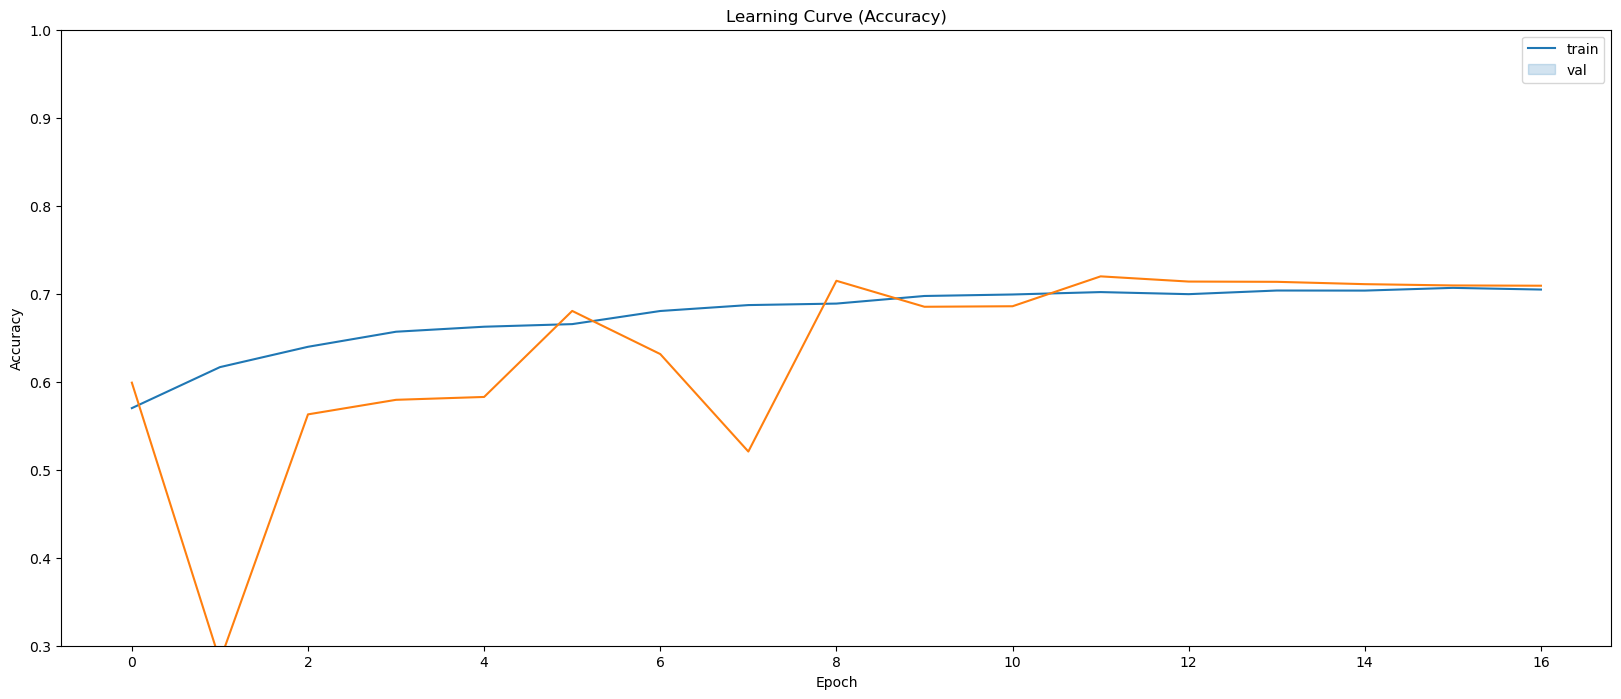

In [27]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.3, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

4235/4235 [==============================] - 35s 8ms/step


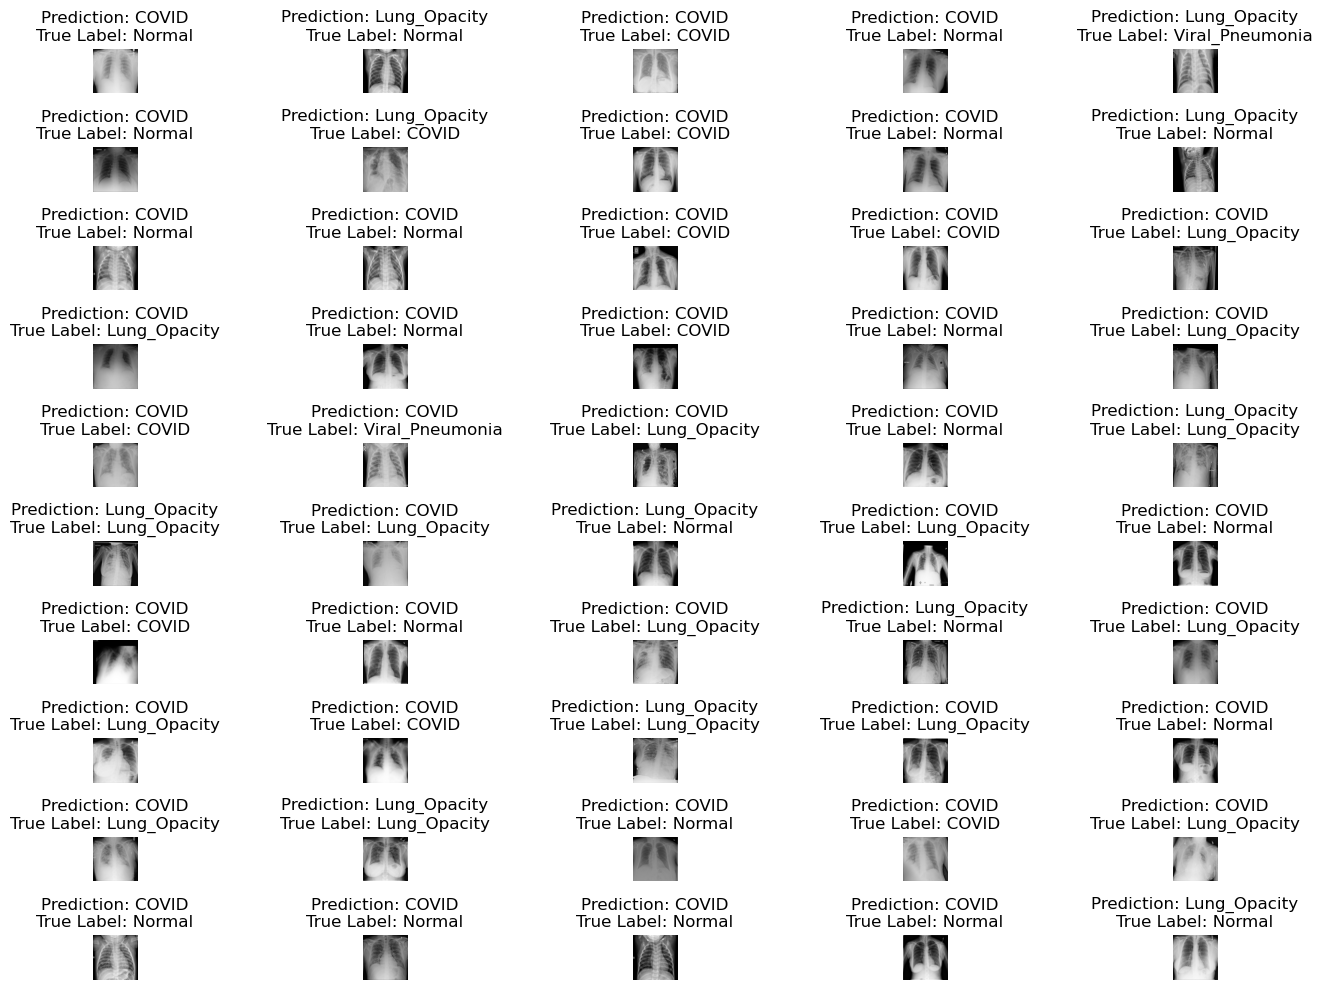

In [28]:
import cv2
# Generating predictions on the test set
y_pred = model.predict(ds_test).flatten()
y_pred_binary = np.where(y_pred > 0.5, 1, 0)  # Convert probabilities to binary predictions

# Get true labels from ds_test
true_labels = ds_test.classes

# Get class names
class_names = ds_test.class_indices
class_names = {v: k for k, v in class_names.items()}

# Visualize predictions
L = 10  # Number of rows in the grid
W = 5 # Number of columns in the grid

fig, axes = plt.subplots(L, W, figsize=(15, 10))
axes = axes.ravel()

for i in range(L * W):
    idx = np.random.randint(0, len(ds_test))
    img_path = ds_test.filepaths[idx]
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB format
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    
    axes[i].imshow(img)
    axes[i].set_title(f'Prediction: {class_names[y_pred_binary[idx]]}\nTrue Label: {class_names[true_labels[idx]]}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [29]:
y_pred

array([0.19547556, 0.71562797, 0.08547479, ..., 0.08701993, 0.34350404,
       0.48581526], dtype=float32)

4235/4235 [==============================] - 29s 7ms/step
Average AUROC: 0.90340


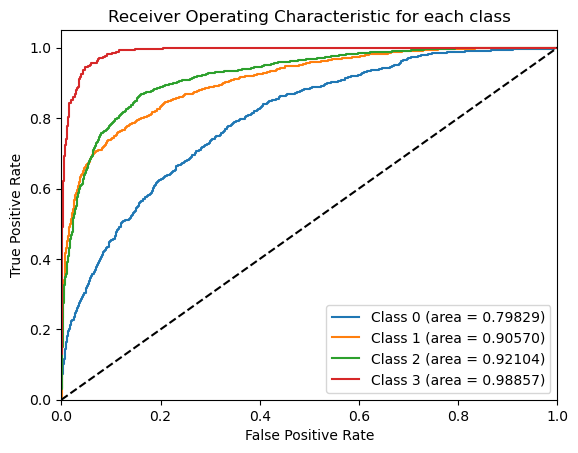

Class 0:
  Sensitivity (Recall): 0.29834
  Specificity: 0.94959
Class 1:
  Sensitivity (Recall): 0.85702
  Specificity: 0.77803
Class 2:
  Sensitivity (Recall): 0.78911
  Specificity: 0.88889
Class 3:
  Sensitivity (Recall): 0.83643
  Specificity: 0.98487
Average Sensitivity: 0.69523
Average Specificity: 0.90035


In [37]:
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming ds_test is your test dataset and model is your trained model
y_pred_prob = model.predict(ds_test)

# Assuming true_labels is the ground truth labels for the test set
true_labels = np.array(true_labels)  # Ensure true_labels is a numpy array

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Binarize the true labels for multi-class AUROC calculation
y_true_binarized = label_binarize(true_labels, classes=np.arange(4))

# Calculate AUROC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculate the average AUROC
average_auc = np.mean(list(roc_auc.values()))
print(f'Average AUROC: {average_auc:.5f}')

# Plot ROC curve for each class
plt.figure()
for i in range(4):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.5f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc='lower right')
plt.show()

# Compute sensitivity and specificity for each class
sensitivity_list = []
specificity_list = []

for i in range(4):
    y_true_binary = (true_labels == i).astype(int)
    y_pred_binary = (np.argmax(y_pred_prob, axis=1) == i).astype(int)

    cm = confusion_matrix(y_true_binary, y_pred_binary)

    if cm.size == 4:
        tn, fp, fn, tp = cm.ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    else:
        sensitivity = 0.0
        specificity = 0.0

    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)

    print(f'Class {i}:')
    print(f'  Sensitivity (Recall): {sensitivity:.5f}')
    print(f'  Specificity: {specificity:.5f}')

# Calculate average sensitivity and specificity across all classes
average_sensitivity = np.mean(sensitivity_list)
average_specificity = np.mean(specificity_list)

print(f'Average Sensitivity: {average_sensitivity:.5f}')
print(f'Average Specificity: {average_specificity:.5f}')

# **POST TRAINING QUANTIZATION**

In [41]:
from tqdm import tqdm
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Representative dataset generator for quantization
def representative_data_gen():
    # Get the total number of batches
    num_batches = len(ds_test)
    # Iterate through the dataset with a progress bar
    for i in tqdm(range(num_batches), desc="Generating representative data"):
        batch = ds_test.next()
        input_value = batch[0]
        yield [input_value]

converter.representative_dataset = representative_data_gen

# Convert the model
quantized_tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /var/folders/k4/gczjyz2n3wqg55mfxfkq7mkr0000gn/T/tmpubsqc7zj/assets


INFO:tensorflow:Assets written to: /var/folders/k4/gczjyz2n3wqg55mfxfkq7mkr0000gn/T/tmpubsqc7zj/assets
/Users/akshayshukla/anaconda3/lib/python3.10/site-packages/tensorflow/lite/python/convert.py:887: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
2024-07-07 23:49:04.348771: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-07-07 23:49:04.348783: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-07-07 23:49:04.348906: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/k4/gczjyz2n3wqg55mfxfkq7mkr0000gn/T/tmpubsqc7zj
2024-07-07 23:49:04.350951: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2024-07-07 23:49:04.350956: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /var/folders/k4/gczjyz2n3wqg55mfxfkq7mkr0

In [87]:
import tensorflow as tf
import numpy as np
from tqdm import tqdm
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Convert the model to a TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Perform post-training quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Optionally, you can provide a representative dataset for better quantization accuracy
def representative_data_gen():
    # Get the total number of batches
    num_batches = len(ds_test)
    # Iterate through the dataset with a progress bar
    for i in tqdm(range(num_batches), desc="Generating representative data"):
        batch = ds_test.next()
        input_value = batch[0]
        yield [input_value]

converter.representative_dataset = representative_data_gen

# Convert the model
tflite_model = converter.convert()

# Load the TFLite model from the byte string and allocate tensors
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

# Initialize lists to store true labels and predictions
y_true = []
y_pred = []

# Loop through the test data and make predictions
for _, row in tqdm(df_test.iterrows(), total=len(df_test), unit="sample"):
    image_path = row['image']
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = image / 255.0
    image = np.expand_dims(image, axis=0)

    interpreter.set_tensor(input_index, image)
    interpreter.invoke()
    output = interpreter.get_tensor(output_index)
    y_pred.append(output[0])
    y_true.append(row['class'])

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Convert string labels to integer labels
label_encoder = LabelEncoder()
y_true_int = label_encoder.fit_transform(y_true)

# One-hot encode the true labels
y_true_one_hot = tf.keras.utils.to_categorical(y_true_int, num_classes=4)

# Calculate AUROC for each class
auroc_scores = []
for i in range(4):
    auroc = roc_auc_score(y_true_one_hot[:, i], y_pred[:, i])
    auroc_scores.append(auroc)
    print(f"Class {i} AUROC: {auroc:.5f}")

# Calculate average AUROC
average_auroc = np.mean(auroc_scores)
print(f"Average AUROC: {average_auroc:.5f}")

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_int, y_pred_labels)

# Calculate sensitivity and specificity for each class
sensitivities = []
specificities = []

for i in range(4):
    tp = conf_matrix[i, i]
    fn = conf_matrix[i, :].sum() - tp
    fp = conf_matrix[:, i].sum() - tp
    tn = conf_matrix.sum() - (tp + fn + fp)
    
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    
    print(f"Class {i} Sensitivity: {sensitivity:.5f}")
    print(f"Class {i} Specificity: {specificity:.5f}")

# Calculate average sensitivity and specificity
average_sensitivity = np.mean(sensitivities)
average_specificity = np.mean(specificities)

print(f"Average Sensitivity: {average_sensitivity:.5f}")
print(f"Average Specificity: {average_specificity:.5f}")


INFO:tensorflow:Assets written to: /var/folders/k4/gczjyz2n3wqg55mfxfkq7mkr0000gn/T/tmpah9og57d/assets


INFO:tensorflow:Assets written to: /var/folders/k4/gczjyz2n3wqg55mfxfkq7mkr0000gn/T/tmpah9og57d/assets
/Users/akshayshukla/anaconda3/lib/python3.10/site-packages/tensorflow/lite/python/convert.py:887: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
2024-07-08 10:51:28.690624: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-07-08 10:51:28.690634: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-07-08 10:51:28.690748: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/k4/gczjyz2n3wqg55mfxfkq7mkr0000gn/T/tmpah9og57d
2024-07-08 10:51:28.692544: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2024-07-08 10:51:28.692550: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /var/folders/k4/gczjyz2n3wqg55mfxfkq7mkr0

Class 0 AUROC: 0.94660
Class 1 AUROC: 0.94567
Class 2 AUROC: 0.95788
Class 3 AUROC: 0.99669
Average AUROC: 0.96171
Class 0 Sensitivity: 0.79834
Class 0 Specificity: 0.92823
Class 1 Sensitivity: 0.84123
Class 1 Specificity: 0.90073
Class 2 Sensitivity: 0.81314
Class 2 Specificity: 0.93443
Class 3 Sensitivity: 0.93309
Class 3 Specificity: 0.99017
Average Sensitivity: 0.84645
Average Specificity: 0.93839


# **QUANTISATION AWARE TRAINING**

In [68]:
import tensorflow_model_optimization as tfmot
qat_model = tfmot.quantization.keras.quantize_model(model)

In [69]:
qat_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [71]:
qat_model.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/50
423/423 [==============================] - 113s 267ms/step - loss: 0.8363 - accuracy: 0.6549 - val_loss: 1.4764 - val_accuracy: 0.2239 - lr: 0.0010
Epoch 2/50
423/423 [==============================] - 111s 262ms/step - loss: 0.7842 - accuracy: 0.6824 - val_loss: 1.0562 - val_accuracy: 0.5617 - lr: 0.0010
Epoch 3/50
423/423 [==============================] - 110s 259ms/step - loss: 0.7339 - accuracy: 0.7031 - val_loss: 0.8680 - val_accuracy: 0.6237 - lr: 0.0010
Epoch 4/50
423/423 [==============================] - 110s 259ms/step - loss: 0.7271 - accuracy: 0.7104 - val_loss: 0.9290 - val_accuracy: 0.6279 - lr: 0.0010
Epoch 5/50
423/423 [==============================] - 111s 262ms/step - loss: 0.6934 - accuracy: 0.7235 - val_loss: 0.8085 - val_accuracy: 0.6654 - lr: 0.0010
Epoch 6/50
423/423 [==============================] - 112s 264ms/step - loss: 0.6710 - accuracy: 0.7267 - val_loss: 1.1956 - val_accuracy: 0.5109 - lr: 0.0010
Epoch 7/50
424/423 [==========================

4235/4235 [==============================] - 29s 7ms/step
Average AUROC: 0.97364


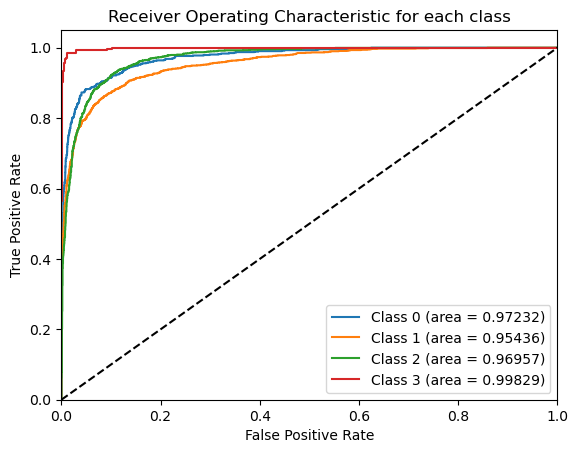

Class 0:
  Sensitivity (Recall): 0.70580
  Specificity: 0.98804
Class 1:
  Sensitivity (Recall): 0.84372
  Specificity: 0.92579
Class 2:
  Sensitivity (Recall): 0.93428
  Specificity: 0.87614
Class 3:
  Sensitivity (Recall): 0.92937
  Specificity: 0.99622
Average Sensitivity: 0.85329
Average Specificity: 0.94655


In [75]:
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming ds_test is your test dataset and model is your trained model
y_pred_prob = qat_model.predict(ds_test)

# Assuming true_labels is the ground truth labels for the test set
true_labels = ds_test.classes
true_labels = np.array(true_labels)  # Ensure true_labels is a numpy array

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Binarize the true labels for multi-class AUROC calculation
y_true_binarized = label_binarize(true_labels, classes=np.arange(4))

# Calculate AUROC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculate the average AUROC
average_auc = np.mean(list(roc_auc.values()))
print(f'Average AUROC: {average_auc:.5f}')

# Plot ROC curve for each class
plt.figure()
for i in range(4):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.5f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc='lower right')
plt.show()

# Compute sensitivity and specificity for each class
sensitivity_list = []
specificity_list = []

for i in range(4):
    y_true_binary = (true_labels == i).astype(int)
    y_pred_binary = (np.argmax(y_pred_prob, axis=1) == i).astype(int)

    cm = confusion_matrix(y_true_binary, y_pred_binary)

    if cm.size == 4:
        tn, fp, fn, tp = cm.ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    else:
        sensitivity = 0.0
        specificity = 0.0

    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)

    print(f'Class {i}:')
    print(f'  Sensitivity (Recall): {sensitivity:.5f}')
    print(f'  Specificity: {specificity:.5f}')

# Calculate average sensitivity and specificity across all classes
average_sensitivity = np.mean(sensitivity_list)
average_specificity = np.mean(specificity_list)

print(f'Average Sensitivity: {average_sensitivity:.5f}')
print(f'Average Specificity: {average_specificity:.5f}')

# **MIXED PRECISION TRAINING**

In [76]:
policy = tf.keras.mixed_precision.Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)

The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


In [77]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [79]:
model.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/50
423/423 [==============================] - 99s 233ms/step - loss: 0.6108 - accuracy: 0.7495 - val_loss: 0.5703 - val_accuracy: 0.7853 - lr: 4.0000e-05
Epoch 2/50
423/423 [==============================] - 99s 233ms/step - loss: 0.6057 - accuracy: 0.7527 - val_loss: 0.7909 - val_accuracy: 0.6967 - lr: 4.0000e-05
Epoch 3/50
424/423 [==============================] - ETA: 0s - loss: 0.5942 - accuracy: 0.7583
Epoch 3: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
423/423 [==============================] - 99s 234ms/step - loss: 0.5942 - accuracy: 0.7583 - val_loss: 0.9113 - val_accuracy: 0.6406 - lr: 4.0000e-05
Epoch 4/50
423/423 [==============================] - 99s 234ms/step - loss: 0.6043 - accuracy: 0.7488 - val_loss: 0.4949 - val_accuracy: 0.8222 - lr: 8.0000e-06
Epoch 5/50
423/423 [==============================] - 99s 233ms/step - loss: 0.6037 - accuracy: 0.7547 - val_loss: 0.5043 - val_accuracy: 0.8190 - lr: 8.0000e-06
Epoch 6/50
424/423 [=========

4235/4235 [==============================] - 21s 5ms/step
Average AUROC: 0.96165


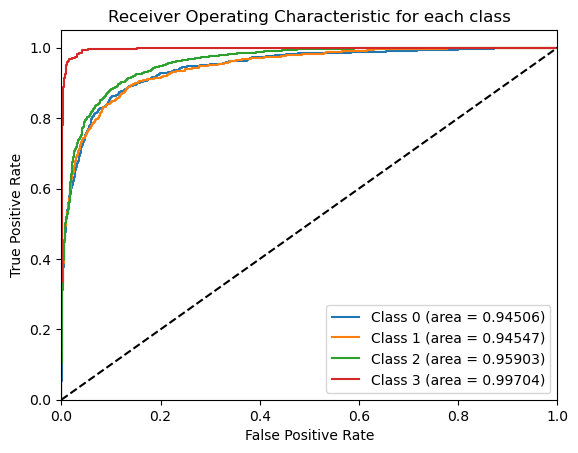

Class 0:
  Sensitivity (Recall): 0.77072
  Specificity: 0.94133
Class 1:
  Sensitivity (Recall): 0.84040
  Specificity: 0.90435
Class 2:
  Sensitivity (Recall): 0.83816
  Specificity: 0.92350
Class 3:
  Sensitivity (Recall): 0.94052
  Specificity: 0.98991
Average Sensitivity: 0.84745
Average Specificity: 0.93977


In [80]:
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming ds_test is your test dataset and model is your trained model
y_pred_prob = model.predict(ds_test)

# Assuming true_labels is the ground truth labels for the test set
true_labels = np.array(true_labels)  # Ensure true_labels is a numpy array

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Binarize the true labels for multi-class AUROC calculation
y_true_binarized = label_binarize(true_labels, classes=np.arange(4))

# Calculate AUROC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculate the average AUROC
average_auc = np.mean(list(roc_auc.values()))
print(f'Average AUROC: {average_auc:.5f}')

# Plot ROC curve for each class
plt.figure()
for i in range(4):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.5f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc='lower right')
plt.show()

# Compute sensitivity and specificity for each class
sensitivity_list = []
specificity_list = []

for i in range(4):
    y_true_binary = (true_labels == i).astype(int)
    y_pred_binary = (np.argmax(y_pred_prob, axis=1) == i).astype(int)

    cm = confusion_matrix(y_true_binary, y_pred_binary)

    if cm.size == 4:
        tn, fp, fn, tp = cm.ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    else:
        sensitivity = 0.0
        specificity = 0.0

    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)

    print(f'Class {i}:')
    print(f'  Sensitivity (Recall): {sensitivity:.5f}')
    print(f'  Specificity: {specificity:.5f}')

# Calculate average sensitivity and specificity across all classes
average_sensitivity = np.mean(sensitivity_list)
average_specificity = np.mean(specificity_list)

print(f'Average Sensitivity: {average_sensitivity:.5f}')
print(f'Average Specificity: {average_specificity:.5f}')